In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import register_translation
from skimage.feature.register_translation import _upsampled_dft
from scipy.ndimage import fourier_shift

In [2]:
import glob
import tkinter.filedialog as tkf

In [18]:
img_dir = tkf.askdirectory()
img_adr = glob.glob(img_dir+"/*.png")
print(len(img_adr))

20


In [19]:
num_img = len(img_adr)
img = []
for adr in img_adr:
    img.append(plt.imread(adr)[:, :, 0])

In [20]:
shift = []
error = []
phasediff = []

In [21]:
for i in range(num_img):
    tmp_shift, tmp_error, tmp_phasediff = register_translation(img[0], img[i])
    shift.append(tmp_shift)
    error.append(tmp_error)
    phasediff.append(tmp_phasediff)

In [22]:
shift = np.asarray(shift)
max_drift = int(np.max(np.absolute(shift)))
print(max_drift)

25


In [23]:
print(shift)

[[  0.   0.]
 [ -3.  -5.]
 [ -8. -11.]
 [-14.  15.]
 [-19.  13.]
 [-24.   9.]
 [ 11.   5.]
 [  5.   2.]
 [  0.  -2.]
 [ -7.  -8.]
 [-13. -13.]
 [-17. -18.]
 [-22.   6.]
 [-25.   2.]
 [ 15.  -4.]
 [ 14. -11.]
 [ 12. -19.]
 [ 12.   2.]
 [ 10.  -3.]
 [  8.  18.]]


In [24]:
overlapped = np.zeros((img[0].shape[0]+max_drift*2, img[1].shape[1]+max_drift*2))
print(overlapped.shape)

(1050, 1050)


In [25]:
img_shape = img[0].shape
print(img_shape)

(1000, 1000)


In [26]:
for i in range(num_img):
    overlapped[max_drift+int(shift[i, 0]):max_drift+int(shift[i, 0])+img_shape[0], 
               max_drift+int(shift[i, 1]):max_drift+int(shift[i, 1])+img_shape[1]] = img[i]

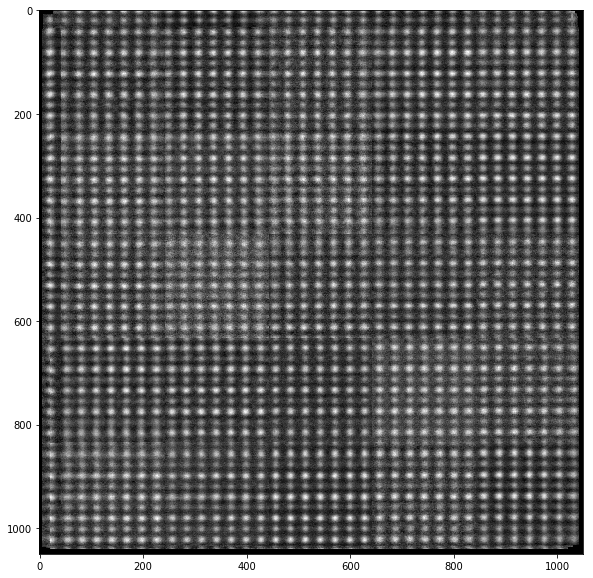

In [27]:
plt.figure(figsize=(10, 10))
plt.imshow(overlapped, cmap="gray")